In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
train = []
test = []
all_data = []

labels = {'R':-1,'M':1}
y_train = []
y_test = []
y_all_data = []
file_name = [['M',"sonar.mines"],['R',"sonar.rocks"]]
for file in file_name:
    f = open(file[1], "r")
    Lines = f.readlines()
    count = 0
    action = False
    data_type = ''
    # Strips the newline character
    data = []
    for line in Lines:
        # recuperation seulement des ligne commencant par * et C, puis de les classer en train et test
        # en train notre ligne commence par *
        if line[0] == '*':
            action = True
            data_type = 'Train'
        #en test si notre ligne commence par C
        elif line[0] == 'C':
            action = True
            data_type = 'Test'
            
        else:
            if action == True :
                l = line.split() # si la ligne commence par * ou C on met la ligne sous forme de liste
                #print(l)
                if len(l) == 6: #si le lenght de notre liste est = à 6 c'est à contenant les chiffre on le met sur 
                    data.extend(l)
                if len(l) == 0: 
                    data[0] = data[0][1:] # suppression de l'accolate { se trouvant au debut
                    data[len(data) - 1] = data[len(data) - 1][:-1] #suppression de l'accolate } se trouvant a la fin
                    data = np.array(data)
                    #print(data)
                   # data = data.astype(np.float)
                    if data_type == 'Train':
                        train.append(list(data))
                        y_train.append(labels[file[0]])
                        all_data.append(list(data))
                        y_all_data.append(labels[file[0]])
                    else:
                        test.append(list(data))
                        y_test.append(labels[file[0]])
                        all_data.append(list(data))
                        y_all_data.append(labels[file[0]])
                    data = []
                    action = False


print('nombre données d apprentissage : ',len(train))
print('nombre données test : ',len(test))
print('nombre de données total : ',len(all_data))

nombre données d apprentissage :  104
nombre données test :  104
nombre de données total :  208


In [3]:
np.savetxt("train.txt", np.array(train), fmt="%s")
np.savetxt("train_labels.txt", np.array(y_train), fmt="%s")
np.savetxt("test.txt", np.array(test), fmt="%s")
np.savetxt("test_labels.txt", np.array(y_test), fmt="%s")
np.savetxt("all_data.txt", np.array(all_data), fmt="%s")
np.savetxt("all_data_labels.txt", np.array(y_all_data), fmt="%s")

In [4]:
train = np.loadtxt("train.txt")
test = np.loadtxt("test.txt")
data = np.loadtxt("all_data.txt")

train_label = np.loadtxt("train_labels.txt")
test_label = np.loadtxt("test_labels.txt")
data_label = np.loadtxt("all_data_labels.txt")

In [5]:
train.shape

(104, 60)

# Parti I

# J'ai choisi d'utiliser l'algorithm de perceptron version batch car il contient moins d'itération et le temps de convergence sur mon TP1 etait plus rapide

In [6]:
def perceptron_version_batch(P, N, X, TAU, alpha):
    #initialisation des Poids
    Weight = np.random.uniform(-1,1,(N+1,1))
    DeltaWeight = np.zeros((N+1,1))
    X = np.append(np.ones((P,1)),X,axis=1)  
    #IT=0
    k=0
    while True :
        #IT+=1
        Y = np.sign(np.dot(X,Weight))
        if np.array_equal(Y,TAU) is True:
            break
            #ajustements des poids
        else:
            DeltaWeight = alpha*(np.dot(X.T,(TAU - Y)))
            Weight = Weight + DeltaWeight
    #print('Le  poid w est :','\n', Weight)
        #k+=1
        
    return Weight

# fonction erreur  pour calculer l'Ea et Eg

In [7]:
def erreur(X, W, tau):
    ones = np.ones((len(X),1))
    X_new = np.append(ones,X,axis=1)
    y = np.sign(X_new@W)
    return np.sum(y != tau)

# la stabilité gamma

In [8]:
def gamma(X, W, tau):
    ones = np.ones((len(X),1))
    X_new = np.append(ones,X,axis=1)
    return tau*(X_new@W)/np.linalg.norm(W)

In [9]:
def plot_stabilite(gamma) :
    plt.hist(gamma,bins=60)
    plt.xlabel('gamma')
    plt.ylabel('Nbre exemples')
    plt.show()


In [10]:
P = 104
N = 60
tau = train_label.reshape((P,1))
alpha = 0.1

print("===== Affichage N+1 Poids W ==============")
W = perceptron_version_batch(P, N, train, tau, alpha) 
print('le N+1 poid est : ','\n', W.squeeze())

===== Affichage N+1 Poids W ==============
le N+1 poid est :  
 [ -97.59370889   83.30464029  210.82783467   38.33899339  110.29577166
   72.7514072   143.85641112  -64.67613896 -158.14848582    8.56377583
  107.44613065   39.40800534   13.52500482    2.50607866    4.19112908
   58.80201602 -194.93536667  -55.61782494  202.58424617  -37.96450241
  -10.16647537  -39.16076343   59.9656041   -44.44622684  107.910952
  -11.86599739  -13.00557167   11.1672445   -20.50451042  -19.22759559
  204.11702886 -305.38951699  232.01181951 -159.90950211   73.85068469
  -40.24848693  -21.08138266  -38.52775193  -20.81968008  170.183523
 -152.3339456    63.10641422  -13.86356271  -11.56570923  -65.76728597
  119.45601557  104.03837512 -106.05093168  209.89522295  289.03608273
 -128.81707905   52.98836151   51.56759829   29.77964848   82.43212574
  -12.21430306  -23.21586375  -54.39944421   33.71965812  -14.12824508
  -16.5430189 ]


In [11]:
print("===== Calcul de l EA et l EG ==============")
print('l erreur d apprentissage = ',erreur(train, W, train_label.reshape((P,1)))) #l'erreur d'apprentissage
print('l erreur de generalisation = ',erreur(test, W, test_label.reshape((P,1)))) #L'erreur de généralisation


===== Calcul de l EA et l EG ==============
l erreur d apprentissage =  0
l erreur de generalisation =  21


In [12]:
print("===== Calcul des stabilites ==============")
d = gamma(test, W, test_label.reshape((P,1))) # calcul des stabilité des P Exemples du tests
print('les valeurs des stabiltés sont :','\n', d.squeeze() )      


===== Calcul des stabilites ==============
les valeurs des stabiltés sont : 
 [-6.21353647e-02 -4.92966037e-02 -2.30270025e-02  3.14309132e-02
 -3.19755832e-02  5.62555025e-02 -4.86023185e-03  1.26925245e-01
  4.45395576e-02 -5.97232762e-03  8.42783574e-02  7.97783454e-03
  5.10329373e-02  2.95948065e-02  1.20192652e-01 -1.57389186e-02
  4.09750941e-02  4.08783739e-02  1.46077748e-01  1.19935441e-01
 -1.03636861e-01  6.78805279e-02  6.50503639e-02  4.63041025e-02
  1.67234964e-01  6.33628871e-02  9.61051298e-02  1.18828995e-01
 -1.22682485e-02  3.71999831e-02  7.06213265e-03 -8.10850686e-03
  5.41145164e-02  4.93263226e-02  2.18186170e-02  1.02723003e-01
 -1.42250746e-02 -2.47051105e-03  4.78446252e-02  7.30053185e-02
  7.92521359e-02  1.29746675e-01  3.77542438e-02  2.01961821e-01
  1.23880986e-01  1.63501778e-01  1.27997115e-01  9.78092417e-02
  3.04321254e-02  4.00104654e-02  4.63163476e-02  8.03160730e-03
 -2.89009856e-02  5.92644884e-02  6.10070572e-02  8.19711507e-02
  1.31994333

===== Affichage stabilite ==============


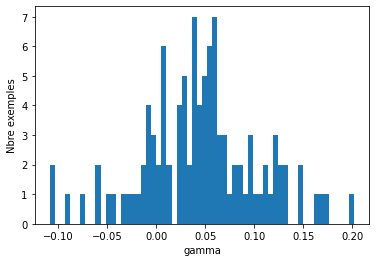

In [13]:
print("===== Affichage stabilite ==============")
plot_stabilite(d)

# 3) Apprendre du test puis évaluer sur train

In [14]:
P = 104
N = 60
tau = test_label.reshape((P,1))
alpha = 0.1
print("===== Affichage N+1 Poids W ==============")
W = perceptron_version_batch(P, N, test, tau, alpha) 
print('le N+1 poid est : ','\n', W.squeeze())

===== Affichage N+1 Poids W ==============
le N+1 poid est :  
 [-33.65112672   7.19725893 -11.74397874  -8.3035814   11.78705969
   6.01989328 -32.93488584 -60.70618729  -3.05916717  44.35681454
  17.49730736  71.49114453  50.10710941   3.96544384 -12.19231866
 -35.44336526  19.82225472   2.12148628 -19.31942211  -5.93216991
  10.99157877  17.16659572   6.07018521  17.82353756  19.06983772
 -26.74867365 -27.70352363   3.41511336  22.7109556    1.06339953
   1.8664158  -21.91364095   9.61357557  -7.49326281 -27.48332131
  14.82642768 -17.30023808 -62.64277029  -5.95571954  35.88156807
 -25.95409777  12.19657435  15.86401694  48.62400464  63.41334212
  34.84509099   4.43575139   9.1024473   24.72505213   0.22881202
  -5.27736675   9.6045295    7.15220938   1.92156251   2.48839652
  -0.46399257   0.82518071   3.22636088   1.8421621    6.86427327
   0.5105958 ]


In [15]:
print("===== Calcul de l EA et l EG ==============")
print('l erreur d apprentissage = ',erreur(test, W, test_label.reshape((P,1)))) #l'erreur d'apprentissage
print('l erreur de generalisation = ',erreur(train, W, train_label.reshape((P,1)))) #L'erreur de généralisation


===== Calcul de l EA et l EG ==============
l erreur d apprentissage =  0
l erreur de generalisation =  25


In [16]:
print("===== Calcul des stabilites ==============")
d = gamma(train, W, train_label.reshape((P,1))) # calcul des stabilité des P Exemples du tests
print('les valeur de la stabilité sont :','\n', d.squeeze())

===== Calcul des stabilites ==============
les valeur de la stabilité sont : 
 [-0.14128419  0.0578742   0.20087521  0.04358099  0.01936641 -0.07740469
  0.01098802 -0.00192776 -0.00604403  0.04268051  0.06043549  0.14384973
  0.13702551  0.15424662  0.21995571  0.09073517  0.12647446 -0.12481542
  0.07509058  0.42422134  0.43117858  0.27173263  0.35490334  0.1594452
  0.14977166 -0.04739078  0.03516267  0.07253381  0.03860439  0.17177444
  0.21195931  0.16604681  0.03498308  0.02969741  0.10978808  0.03475159
  0.32286294  0.02784832 -0.06070109  0.07846289  0.56711351  0.47339317
  0.20385718  0.02698075  0.02115268  0.2514257   0.26936162  0.10152144
  0.09674821 -0.02972553 -0.03104042 -0.30718827 -0.05162925 -0.19529549
  0.08495525 -0.16204934 -0.04540812 -0.01027952  0.25348779  0.11286712
  0.02574703  0.06980861  0.29034375  0.10312939  0.20293849 -0.32037597
 -0.00599421  0.15566989  0.33632686  0.08774782 -0.00733532  0.00379961
 -0.14277887  0.05571046  0.22737295 -0.133022

===== Affichage stabilite ==============


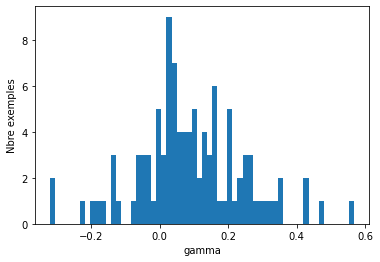

In [17]:
print("===== Affichage stabilite ==============")
plot_stabilite(d)

# PARTIE II

In [18]:
def apprentissage_pocket(P,N,X,tau,alpha,nb_epochs,Ea_limit,W_init):
    W = W_init   #initialisation de poids
    W_pocket= W.copy()   # initialisation du vecteur de poids de poche
    error_min = len(tau)  #initialisation error à sa plus grande valeur
    for k in range(nb_epochs) :
        dW = np.zeros((N+1,1))
        ones = np.ones((P,1))
        X_new = np.append(ones,X,axis=1)
        y= np.sign(X_new@W)
        if not np.array_equal(y,tau):   #  si la valeur predicte est different du tau(valeur relle)
            dW = X_new.T@(tau - y)      #alors on met a jour le poids
            W = W + dW
            error = erreur(X,W,tau)   # et on calcule l'erreur
        if error < error_min :    #on campare si l'erreur est plus petit que l'erreur min
            error_min = error    # on met a jour l'erreur min à l'erreur trouver
            W_pocket = W.copy()           # et on copie aussi le poids sur W_pocket
        
        if error_min <= Ea_limit :    #critere d'arret à un Ea fixé
            break
    return W_pocket
            

====================== Ea_limit =  10 ================================
-------------------Affichage N+1 poids W --------------------
le N+1 poid W est : [ -733.81096493   381.01725734   657.98791828   342.53750134
   654.32486529   707.86741304   486.10858873  -140.019058
  -846.26583275    26.95229368   289.61203644   679.97772729
   185.50699004    24.45338731   131.1235897    306.52578029
  -865.62199753  -258.89628588   523.9185195     37.07413394
   -62.3209023     40.40943636   137.99382585   -73.49539105
   428.32793484   -74.991913     -10.44889127     4.59341921
  -182.95397019   191.98438443   619.9732599  -1089.07535348
   520.39555545    27.03369958  -198.21836084     7.34144967
  -245.13027661  -230.08402126   373.93710274   233.22772842
  -617.71879557   203.94805622  -188.7677942    -34.5639863
    82.35758367   566.49659656   419.73703614   317.38401443
   827.45096227   883.09610674   -82.50651011   131.5232219
   135.41587588    53.00786204   140.23198422   -57.548864

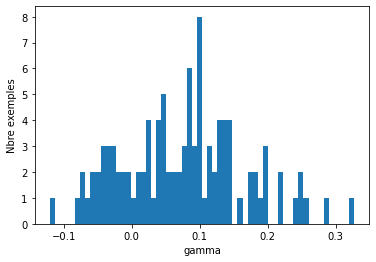



====================== Ea_limit =  8 ================================
-------------------Affichage N+1 poids W --------------------
le N+1 poid W est : [ -775.31603903   499.45214905   828.86199565   401.43226191
   797.53657582   810.19728647   602.89886012  -202.9628736
 -1009.13461677     1.42941436   325.27634553   740.08592478
   167.40214494   -35.29811876    98.43036989   430.04062281
 -1027.36283601  -282.26652336   692.95569543   -42.15790217
   -38.87034863    36.98212494    97.77797665   -94.38158708
   534.16635969  -112.14525287   -32.44928621    47.80462028
  -225.18810049   182.00309751   803.48193733 -1301.02101885
   692.85766734   -45.90112399  -206.25534012   -20.40079268
  -225.80200735  -249.03749657   321.49652339   329.65942535
  -697.14623806   245.78653207  -233.36017596    21.34888086
     8.44117672   593.38464725   450.82403481   272.62063083
   985.17367949  1106.76441529  -132.79346817   168.65591174
   178.45258743    66.58568537   189.53810796   -73.83

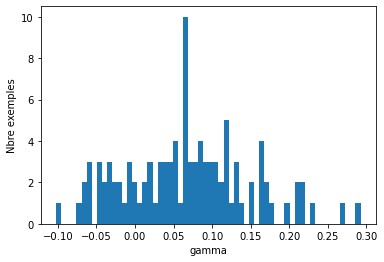



====================== Ea_limit =  6 ================================
-------------------Affichage N+1 poids W --------------------
le N+1 poid W est : [ -827.76875157   700.07025653  1150.56263603   440.34402164
   970.73937447   816.13468101   808.7869533   -325.82780149
 -1194.81032188    -6.90455056   450.6671718    722.06326595
   145.31709155  -135.28372236   -24.3306672    651.80303572
 -1310.63679549  -376.87625501  1117.59723699  -198.96220453
   -51.73609821    21.21289966   115.83697092  -164.63894163
   721.32459351  -126.94547417   -76.92439027    66.75259219
  -235.56192883    94.30789486  1145.83076819 -1773.51048338
  1123.98567468  -365.20932545   -38.79553534   -51.993552
  -245.02709401  -256.00900399   233.46622959   588.25547223
  -824.58357506   286.81649413  -255.53014269   133.16617508
  -212.68154653   661.26738704   539.90511156   -12.11026714
  1265.26083901  1588.98140897  -312.79326744   252.86051459
   266.27002352    88.94779683   335.49886493   -98.923

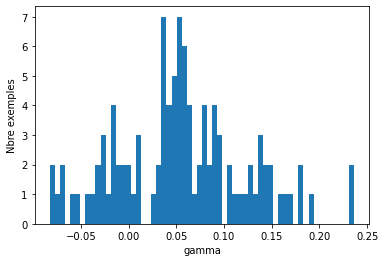

In [19]:
P = 104
N = 60
tau = train_label.reshape((P,1))
alpha = 0.1
nb_epochs = 10000
Ealim=[10,8,6]
for i in Ealim :
    
    print("====================== Ea_limit = ", i, "================================")

    W_init = np.random.rand(N+1,1)
    W = apprentissage_pocket(P, N, train, tau, alpha, nb_epochs, i, W_init)
    print("-------------------Affichage N+1 poids W --------------------")
    print('le N+1 poid W est :', W.squeeze())
    print('\n')
    print("-------------------Calcule erreur Ea et Eg --------------------")
    print('l erreur d apprentissage = ',erreur(train, W, train_label.reshape((P,1)))) #l'erreur d'apprentissage
    print('l erreur de generalisation = ',erreur(test, W, test_label.reshape((P,1)))) #L'erreur de généralisation
    print('\n')
    print("-------------------calcul les  stabilite --------------------")
    d = gamma(test, W, test_label.reshape((P,1)))
    print('les valeur de la stabilité sont :','\n', d.squeeze())
    print('\n')
    print("-------------------Affichage stabilite --------------------")
    plot_stabilite(d)
    print('\n')
    





# Test sur initialisation aleatoir et initialisation hebb

In [20]:
# Fonction qui retourne le W Hebb
def hebb (P, N, X, tau) :
    W = np.zeros((N+1,1))
    ones = np.ones((P,1))
    X_new = np.append(ones,X,axis=1)
    product = (X_new.T@tau).reshape((N+1,1))
    W = W + product
    return W
    

# Apprentissage sur le train et tester sur les données tests avec alpha = 0.1, 0.7,1

# Alpha = 0.1

======= Initialisation Aleatoire avec Ea_limit =  10 =========
-------------------Affichage N+1 poids W --------------------
le N+1 poid W est : [ -723.8764286    375.72378488   650.48325457   345.12112527
   652.95885835   711.8361647    483.90178342  -140.99724902
  -835.24237969    30.78754082   291.1427102    679.67493268
   195.25173431    39.33061533   147.84239973   297.42031524
  -867.70661402  -256.95334275   506.7234709     34.95012844
   -70.01377339    38.40349111   144.48866932   -70.27592342
   417.37652423   -70.75678774    -9.99025664     2.00278647
  -178.04499499   201.77969549   608.85232869 -1079.27401097
   509.77497003    31.61170732  -194.55857091     2.20438185
  -259.98754869  -236.10505842   375.46503145   227.91532793
  -613.12265655   213.29286312  -174.51534199   -27.63549855
    80.59196919   568.51723729   426.12601397   329.79553433
   824.10215937   873.5842599    -80.61769575   129.43591886
   133.58546533    53.38290182   137.62194482   -56.17929818
 

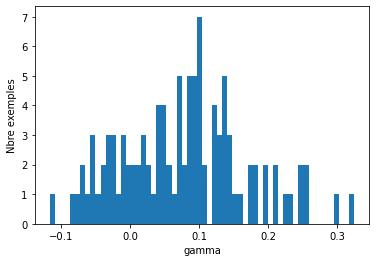



======= Initialisation Hebb avec Ea_limit =  10 =========
-------------------Affichage N+1 poids W --------------------
le N+1 poid W est : [ -734.       391.6159   674.9786   354.2572   673.4715   724.4155
   497.9937  -150.2095  -859.8834    24.7278   291.7037   692.123
   195.7732    29.3711   139.3244   316.9467  -893.2634  -257.6396
   531.0591    24.2703   -57.1057    46.4084   142.7204   -77.9014
   434.7998   -74.0315    -8.8522    13.3018  -185.2704   192.7968
   636.0981 -1117.3358   532.3697    21.907   -198.2134     3.1643
  -249.0229  -239.2317   368.5848   242.3422  -623.7815   218.4842
  -187.0743   -28.9129    69.4774   572.3656   422.326    315.5643
   847.2367   909.9114   -86.1138   134.3113   139.5452    55.1048
   145.448    -59.958    -23.3178   -80.5664    79.5172    35.8751
     9.7795]


-------------------Calcule erreur Ea et Eg --------------------
l erreur d apprentissage =  10
l erreur de generalisation =  25


-------------------calcul les  stabilite ---

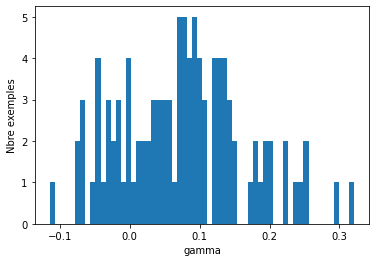



======= Initialisation Aleatoire avec Ea_limit =  8 =========
-------------------Affichage N+1 poids W --------------------
le N+1 poid W est : [ -771.88526535   487.48515686   808.72486335   398.11482334
   780.61998783   798.09000342   589.66738158  -197.63191226
  -993.14734864    -5.72117737   314.71594679   723.13401328
   163.48494337   -26.03758716   100.65664108   413.61333755
 -1012.10848514  -275.37402055   670.964231     -36.60611467
   -45.85261381    32.27831775   106.75838227   -78.96397382
   532.92388448  -101.40060663   -35.58131263    28.55645788
  -234.1662809    178.63584982   779.74361525 -1280.77876266
   676.82245062   -29.89735045  -190.63257373    -4.94081524
  -217.60883081  -236.95679819   325.13320153   309.89007872
  -684.53814785   241.70433147  -229.0106315     13.23831805
    13.85519785   588.87512384   440.84595126   276.15299956
   970.56691966  1082.44441176  -128.45002465   163.69561835
   173.02576205    65.15240616   184.56400093   -71.4001466
 

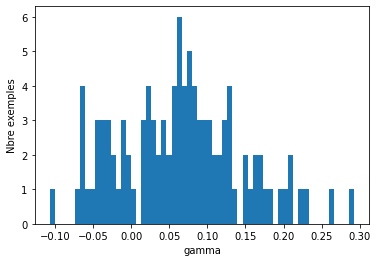



======= Initialisation Hebb avec Ea_limit =  8 =========
-------------------Affichage N+1 poids W --------------------
le N+1 poid W est : [-7.8800000e+02  5.3589890e+02  8.8023520e+02  4.2011140e+02
  8.3447130e+02  8.2566650e+02  6.3619350e+02 -2.2318730e+02
 -1.0452738e+03  1.0354000e+00  3.3672190e+02  7.4862720e+02
  1.6775540e+02 -5.2153100e+01  8.3266400e+01  4.7735390e+02
 -1.0728476e+03 -2.9264140e+02  7.4666870e+02 -7.6110500e+01
 -2.1235300e+01  3.9489600e+01  8.9047600e+01 -1.0172820e+02
  5.6682820e+02 -1.1498850e+02 -5.5632400e+01  5.5479400e+01
 -2.3687480e+02  1.7001980e+02  8.6547650e+02 -1.3743538e+03
  7.5391350e+02 -8.2928600e+01 -1.9307040e+02 -2.3875500e+01
 -2.2209750e+02 -2.5150170e+02  3.0698340e+02  3.5485820e+02
 -7.1923250e+02  2.5617940e+02 -2.4742390e+02  4.0812900e+01
 -2.1671200e+01  5.9982040e+02  4.5362180e+02  2.4660630e+02
  1.0334193e+03  1.1783934e+03 -1.5238980e+02  1.8126290e+02
  1.9037980e+02  7.0490200e+01  2.0909840e+02 -7.8813600e+01
 -3.3

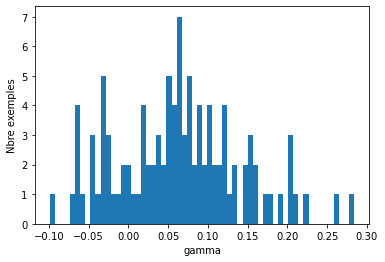



======= Initialisation Aleatoire avec Ea_limit =  6 =========
-------------------Affichage N+1 poids W --------------------
le N+1 poid W est : [ -825.44131368   698.64663222  1141.29029366   434.01929927
   966.91960878   812.76974926   798.36109727  -317.16623798
 -1197.1309321    -11.32569581   449.75673064   719.75147657
   140.97651993  -131.98314694   -20.08114068   650.64196987
 -1307.76046757  -364.05546052  1112.93097806  -198.30888642
   -48.48253571    26.48392677   103.33954808  -156.68816957
   713.39184809  -129.30732297   -77.67098474    67.30603551
  -236.58415335   103.10896242  1130.47515139 -1761.41156781
  1117.49312505  -363.06467955   -43.02570268   -48.81612682
  -244.84447198  -251.94576541   239.10335761   582.42011599
  -820.31571515   279.91550402  -261.2710726    126.42538113
  -205.99261013   655.28080288   534.73636598    -2.88878818
  1264.31650063  1580.64962909  -307.7534522    249.65230283
   263.27693951    86.71433978   330.36600136   -97.28961342


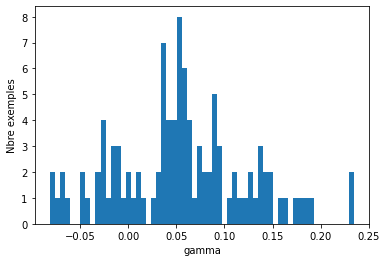



======= Initialisation Hebb avec Ea_limit =  6 =========
-------------------Affichage N+1 poids W --------------------
le N+1 poid W est : [-8.3000000e+02  7.0416670e+02  1.1583172e+03  4.4050600e+02
  9.7469050e+02  8.1879650e+02  8.1642950e+02 -3.2062670e+02
 -1.1933142e+03  4.1920000e-01  4.6325790e+02  7.3201700e+02
  1.5277540e+02 -1.2992090e+02 -1.8121600e+01  6.7181490e+02
 -1.3089808e+03 -3.7017160e+02  1.1218049e+03 -2.0574030e+02
 -4.8708500e+01  2.3125600e+01  1.1028380e+02 -1.7860600e+02
  7.1485700e+02 -1.3046670e+02 -7.1739400e+01  7.3584600e+01
 -2.3209720e+02  8.9913200e+01  1.1527869e+03 -1.7897382e+03
  1.1240789e+03 -3.8596700e+02 -2.9654800e+01 -4.4709500e+01
 -2.4500570e+02 -2.6111910e+02  2.3500620e+02  5.9595960e+02
 -8.3629530e+02  2.8529800e+02 -2.5805750e+02  1.3247910e+02
 -2.1260220e+02  6.7042820e+02  5.4616520e+02 -2.0544700e+01
  1.2789347e+03  1.6076270e+03 -3.1720700e+02  2.5441730e+02
  2.6629280e+02  8.9005000e+01  3.3953580e+02 -9.9075200e+01
 -5.8

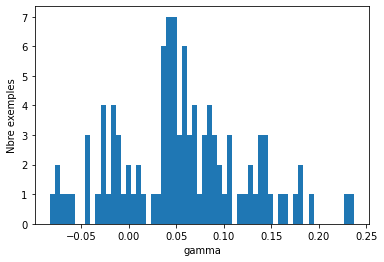

In [21]:
P = 104
N = 60
tau = train_label.reshape((P,1))
alpha = 0.1
nb_epochs = 10000
Ealim=[10,8,6]
for i in Ealim :
    
    print("======= Initialisation Aleatoire avec Ea_limit = ", i, "=========")

    W_init_aleatoire = np.random.rand(N+1,1)
    print("-------------------Affichage N+1 poids W --------------------")
    W = apprentissage_pocket(P, N, train, tau, alpha, nb_epochs, i, W_init_aleatoire)
    print('le N+1 poid W est :', W.squeeze())
    print('\n')
    print("-------------------Calcule erreur Ea et Eg --------------------")
    print('l erreur d apprentissage = ',erreur(train, W, train_label.reshape((P,1)))) 
    print('l erreur de generalisation = ',erreur(test, W, test_label.reshape((P,1))))
    print('\n')
    print("-------------------calcul les  stabilite --------------------")
    d = gamma(test, W, test_label.reshape((P,1)))
    print('les valeur de la stabilité sont :','\n', d.squeeze())
    print('\n')
    print("-------------------Affichage stabilite --------------------")
    plot_stabilite(d)
    print('\n')
    
    print("======= Initialisation Hebb avec Ea_limit = ", i, "=========")
    
    W_init_hebb = hebb(P,N,train,tau)
    print("-------------------Affichage N+1 poids W --------------------")
    W = apprentissage_pocket(P, N, train, tau, alpha, nb_epochs, i, W_init_hebb)
    print('le N+1 poid W est :', W.squeeze())
    print('\n')
    print("-------------------Calcule erreur Ea et Eg --------------------")
    print('l erreur d apprentissage = ',erreur(train, W, train_label.reshape((P,1)))) 
    print('l erreur de generalisation = ',erreur(test, W, test_label.reshape((P,1)))) 
    print('\n')
    print("-------------------calcul les  stabilite --------------------")
    d = gamma(test, W, test_label.reshape((P,1)))
    print('les valeur de la stabilité sont :','\n', d.squeeze())
    print('\n')
    print("-------------------Affichage stabilite --------------------")
    plot_stabilite(d)
    print('\n')
    
    

# Alpha = 0.7

======= Initialisation Aleatoire avec Ea_limit =  10 =========
-------------------Affichage N+1 poids W --------------------
le N+1 poid W est : [ -731.73654932   381.99825941   659.07889234   347.23260412
   657.26896738   709.8406385    483.45623323  -148.09517245
  -846.01840827    33.69889577   287.67035091   685.79348608
   194.11793793    33.05956234   136.5560223    297.23628109
  -872.192888    -256.86699902   514.48103786    26.87481441
   -64.81914686    47.78723243   138.1198694    -71.92500388
   429.07735975   -69.42015748    -9.09708674     2.11547921
  -181.87600028   195.94251915   624.28566929 -1090.14620281
   525.80709512    30.22153773  -196.01290346     8.98026949
  -247.87039155  -234.24812936   372.73546473   231.65640644
  -622.05461752   209.27182163  -185.71290379   -34.51718466
    76.18474433   566.90339467   420.74267626   318.97883179
   828.3527685    887.26673981   -83.08093237   130.54174983
   136.02425775    54.31644866   140.19993203   -57.18381459
 

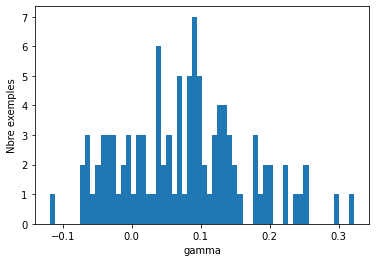



======= Initialisation Hebb avec Ea_limit =  10 =========
-------------------Affichage N+1 poids W --------------------
le N+1 poid W est : [ -734.       391.6159   674.9786   354.2572   673.4715   724.4155
   497.9937  -150.2095  -859.8834    24.7278   291.7037   692.123
   195.7732    29.3711   139.3244   316.9467  -893.2634  -257.6396
   531.0591    24.2703   -57.1057    46.4084   142.7204   -77.9014
   434.7998   -74.0315    -8.8522    13.3018  -185.2704   192.7968
   636.0981 -1117.3358   532.3697    21.907   -198.2134     3.1643
  -249.0229  -239.2317   368.5848   242.3422  -623.7815   218.4842
  -187.0743   -28.9129    69.4774   572.3656   422.326    315.5643
   847.2367   909.9114   -86.1138   134.3113   139.5452    55.1048
   145.448    -59.958    -23.3178   -80.5664    79.5172    35.8751
     9.7795]


-------------------Calcule erreur Ea et Eg --------------------
l erreur d apprentissage =  10
l erreur de generalisation =  25


-------------------calcul les  stabilite ---

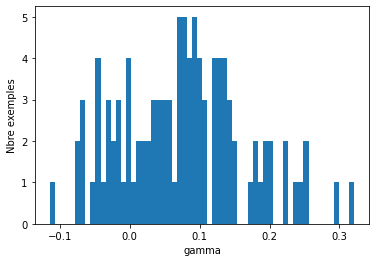



======= Initialisation Aleatoire avec Ea_limit =  8 =========
-------------------Affichage N+1 poids W --------------------
le N+1 poid W est : [ -767.43444021   493.45657425   818.99037238   401.86961047
   785.61821202   798.37494502   593.78067949  -203.52216307
 -1000.23325414    -6.71037013   315.82428269   731.93075881
   165.54449781   -26.25178733    93.51707406   419.97546552
 -1014.11242621  -277.90872937   677.49690026   -40.94384816
   -43.48945952    33.83409365   102.129819     -87.94525019
   538.09932185  -100.65527957   -37.677413      32.60602697
  -234.96553616   172.45208624   793.00338296 -1295.00132227
   692.72982028   -36.70497956  -192.51000104    -2.54693663
  -216.15314439  -238.30570188   322.64287588   314.87126775
  -690.78124901   239.4387034   -228.62255751    21.04930953
     6.99771726   587.27167633   436.04964559   269.62799813
   977.71437362  1095.18286756  -131.73299091   166.52997992
   174.88675776    65.92975996   187.93472564   -71.95575465


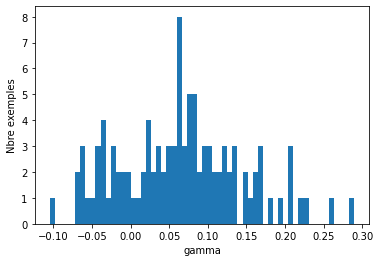



======= Initialisation Hebb avec Ea_limit =  8 =========
-------------------Affichage N+1 poids W --------------------
le N+1 poid W est : [-7.8800000e+02  5.3589890e+02  8.8023520e+02  4.2011140e+02
  8.3447130e+02  8.2566650e+02  6.3619350e+02 -2.2318730e+02
 -1.0452738e+03  1.0354000e+00  3.3672190e+02  7.4862720e+02
  1.6775540e+02 -5.2153100e+01  8.3266400e+01  4.7735390e+02
 -1.0728476e+03 -2.9264140e+02  7.4666870e+02 -7.6110500e+01
 -2.1235300e+01  3.9489600e+01  8.9047600e+01 -1.0172820e+02
  5.6682820e+02 -1.1498850e+02 -5.5632400e+01  5.5479400e+01
 -2.3687480e+02  1.7001980e+02  8.6547650e+02 -1.3743538e+03
  7.5391350e+02 -8.2928600e+01 -1.9307040e+02 -2.3875500e+01
 -2.2209750e+02 -2.5150170e+02  3.0698340e+02  3.5485820e+02
 -7.1923250e+02  2.5617940e+02 -2.4742390e+02  4.0812900e+01
 -2.1671200e+01  5.9982040e+02  4.5362180e+02  2.4660630e+02
  1.0334193e+03  1.1783934e+03 -1.5238980e+02  1.8126290e+02
  1.9037980e+02  7.0490200e+01  2.0909840e+02 -7.8813600e+01
 -3.3

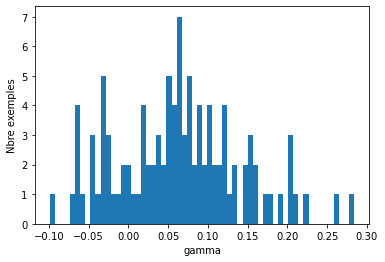



======= Initialisation Aleatoire avec Ea_limit =  6 =========
-------------------Affichage N+1 poids W --------------------
le N+1 poid W est : [-8.23526324e+02  6.87405175e+02  1.12103241e+03  4.43153944e+02
  9.61689195e+02  8.27312255e+02  7.85329668e+02 -3.15452145e+02
 -1.18264966e+03  2.57607870e+00  4.39472616e+02  7.37438198e+02
  1.45276605e+02 -1.27533722e+02 -1.72381066e+00  6.41846444e+02
 -1.27886810e+03 -3.61348712e+02  1.07186562e+03 -1.95668237e+02
 -4.02404621e+01  2.56571085e+01  9.43487400e+01 -1.51478576e+02
  7.01557788e+02 -1.23841100e+02 -7.03847389e+01  6.98846022e+01
 -2.38946571e+02  1.03838311e+02  1.11170541e+03 -1.73189245e+03
  1.07543814e+03 -3.37110941e+02 -6.36415281e+01 -4.38360522e+01
 -2.49736537e+02 -2.49344430e+02  2.44648869e+02  5.58990338e+02
 -8.17678278e+02  2.92190140e+02 -2.58124250e+02  1.25813014e+02
 -1.80095490e+02  6.58055774e+02  5.26526150e+02  2.84207161e+01
  1.24669550e+03  1.54225811e+03 -2.91821237e+02  2.44138958e+02
  2.58082

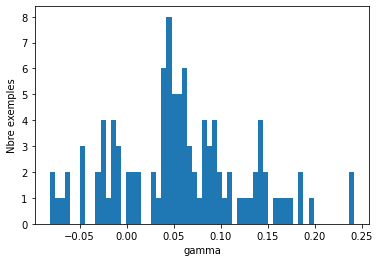



======= Initialisation Hebb avec Ea_limit =  6 =========
-------------------Affichage N+1 poids W --------------------
le N+1 poid W est : [-8.3000000e+02  7.0416670e+02  1.1583172e+03  4.4050600e+02
  9.7469050e+02  8.1879650e+02  8.1642950e+02 -3.2062670e+02
 -1.1933142e+03  4.1920000e-01  4.6325790e+02  7.3201700e+02
  1.5277540e+02 -1.2992090e+02 -1.8121600e+01  6.7181490e+02
 -1.3089808e+03 -3.7017160e+02  1.1218049e+03 -2.0574030e+02
 -4.8708500e+01  2.3125600e+01  1.1028380e+02 -1.7860600e+02
  7.1485700e+02 -1.3046670e+02 -7.1739400e+01  7.3584600e+01
 -2.3209720e+02  8.9913200e+01  1.1527869e+03 -1.7897382e+03
  1.1240789e+03 -3.8596700e+02 -2.9654800e+01 -4.4709500e+01
 -2.4500570e+02 -2.6111910e+02  2.3500620e+02  5.9595960e+02
 -8.3629530e+02  2.8529800e+02 -2.5805750e+02  1.3247910e+02
 -2.1260220e+02  6.7042820e+02  5.4616520e+02 -2.0544700e+01
  1.2789347e+03  1.6076270e+03 -3.1720700e+02  2.5441730e+02
  2.6629280e+02  8.9005000e+01  3.3953580e+02 -9.9075200e+01
 -5.8

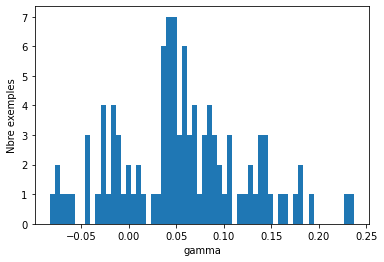

In [22]:
P = 104
N = 60
tau = train_label.reshape((P,1))
alpha = 0.7
nb_epochs = 10000
Ealim=[10,8,6]
for i in Ealim :
    
    print("======= Initialisation Aleatoire avec Ea_limit = ", i, "=========")

    W_init_aleatoire = np.random.rand(N+1,1)
    print("-------------------Affichage N+1 poids W --------------------")
    W = apprentissage_pocket(P, N, train, tau, alpha, nb_epochs, i, W_init_aleatoire)
    print('le N+1 poid W est :', W.squeeze())
    print('\n')
    print("-------------------Calcule erreur Ea et Eg --------------------")
    print('l erreur d apprentissage = ',erreur(train, W, train_label.reshape((P,1)))) 
    print('l erreur de generalisation = ',erreur(test, W, test_label.reshape((P,1))))
    print('\n')
    print("-------------------calcul les  stabilite --------------------")
    d = gamma(test, W, test_label.reshape((P,1)))
    print('les valeur de la stabilité sont :','\n', d.squeeze())
    print('\n')
    print("-------------------Affichage stabilite --------------------")
    plot_stabilite(d)
    print('\n')
    
    print("======= Initialisation Hebb avec Ea_limit = ", i, "=========")
    
    W_init_hebb = hebb(P,N,train,tau)
    print("-------------------Affichage N+1 poids W --------------------")
    W = apprentissage_pocket(P, N, train, tau, alpha, nb_epochs, i, W_init_hebb)
    print('le N+1 poid W est :', W.squeeze())
    print('\n')
    print("-------------------Calcule erreur Ea et Eg --------------------")
    print('l erreur d apprentissage = ',erreur(train, W, train_label.reshape((P,1)))) 
    print('l erreur de generalisation = ',erreur(test, W, test_label.reshape((P,1)))) 
    print('\n')
    print("-------------------calcul les  stabilite --------------------")
    d = gamma(test, W, test_label.reshape((P,1)))
    print('les valeur de la stabilité sont :','\n', d.squeeze())
    print('\n')
    print("-------------------Affichage stabilite --------------------")
    plot_stabilite(d)
    print('\n')
    
    

# Alpha = 1

======= Initialisation Aleatoire avec Ea_limit =  10 =========
-------------------Affichage N+1 poids W --------------------
le N+1 poid W est : [ -715.38551903   366.25510695   635.98762971   336.86338247
   636.90616665   697.20878324   469.5812081   -139.85996716
  -820.65641481    24.39181634   283.21732859   670.01363409
   194.06237527    40.24683215   141.2849609    285.31852484
  -852.42080389  -251.12718213   498.61932608    39.06429438
   -74.87184208    35.52464023   156.06739196   -67.28656791
   411.76776066   -63.16372788   -11.80993813   -17.43524327
  -178.66885868   201.99146297   594.74528066 -1068.43777338
   499.26382846    42.47744972  -185.43804538     5.25115874
  -257.62622495  -236.23899857   383.02585589   223.20710585
  -606.09333534   208.04203212  -168.30614485   -31.68817758
    87.90348914   570.42953144   425.12223231   328.03031292
   813.7235684    858.66381382   -76.51963853   127.42615324
   130.8552338     53.1113435    135.75888892   -55.01028944
 

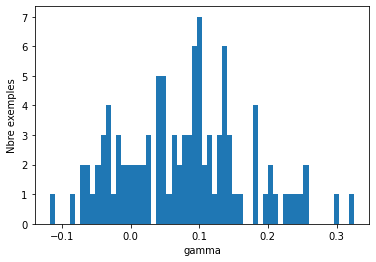



======= Initialisation Hebb avec Ea_limit =  10 =========
-------------------Affichage N+1 poids W --------------------
le N+1 poid W est : [ -734.       391.6159   674.9786   354.2572   673.4715   724.4155
   497.9937  -150.2095  -859.8834    24.7278   291.7037   692.123
   195.7732    29.3711   139.3244   316.9467  -893.2634  -257.6396
   531.0591    24.2703   -57.1057    46.4084   142.7204   -77.9014
   434.7998   -74.0315    -8.8522    13.3018  -185.2704   192.7968
   636.0981 -1117.3358   532.3697    21.907   -198.2134     3.1643
  -249.0229  -239.2317   368.5848   242.3422  -623.7815   218.4842
  -187.0743   -28.9129    69.4774   572.3656   422.326    315.5643
   847.2367   909.9114   -86.1138   134.3113   139.5452    55.1048
   145.448    -59.958    -23.3178   -80.5664    79.5172    35.8751
     9.7795]


-------------------Calcule erreur Ea et Eg --------------------
l erreur d apprentissage =  10
l erreur de generalisation =  25


-------------------calcul les  stabilite ---

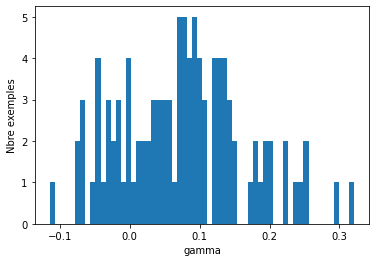



======= Initialisation Aleatoire avec Ea_limit =  8 =========
-------------------Affichage N+1 poids W --------------------
le N+1 poid W est : [ -783.96323166   525.09573954   861.46392236   415.45781074
   821.24679548   820.20030918   626.33906424  -217.48451019
 -1033.3359078      6.38369137   336.52703384   743.87062112
   163.26904961   -42.87665048    92.35399583   462.88166037
 -1051.9162591   -288.1538403    725.63942659   -59.14098973
   -24.27577238    39.8000586     89.42096425   -92.48327107
   557.66505535  -111.35332527   -46.03469664    53.33294335
  -238.08075502   164.28326087   838.21185796 -1348.03913189
   734.39470871   -63.07033608  -191.06375317   -12.72582394
  -218.02281262  -249.36654349   306.63510407   335.59284862
  -715.67495531   250.51138983  -247.96077437    29.27472492
   -14.34986138   592.94765264   444.59884778   251.13449548
  1010.27276567  1147.72157004  -144.96008706   177.07004463
   186.27250426    69.37336593   201.75547604   -75.65767135


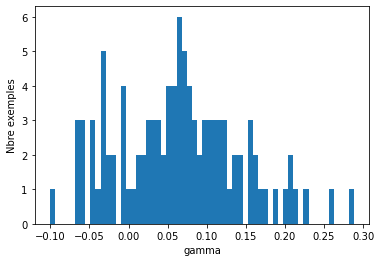



======= Initialisation Hebb avec Ea_limit =  8 =========
-------------------Affichage N+1 poids W --------------------
le N+1 poid W est : [-7.8800000e+02  5.3589890e+02  8.8023520e+02  4.2011140e+02
  8.3447130e+02  8.2566650e+02  6.3619350e+02 -2.2318730e+02
 -1.0452738e+03  1.0354000e+00  3.3672190e+02  7.4862720e+02
  1.6775540e+02 -5.2153100e+01  8.3266400e+01  4.7735390e+02
 -1.0728476e+03 -2.9264140e+02  7.4666870e+02 -7.6110500e+01
 -2.1235300e+01  3.9489600e+01  8.9047600e+01 -1.0172820e+02
  5.6682820e+02 -1.1498850e+02 -5.5632400e+01  5.5479400e+01
 -2.3687480e+02  1.7001980e+02  8.6547650e+02 -1.3743538e+03
  7.5391350e+02 -8.2928600e+01 -1.9307040e+02 -2.3875500e+01
 -2.2209750e+02 -2.5150170e+02  3.0698340e+02  3.5485820e+02
 -7.1923250e+02  2.5617940e+02 -2.4742390e+02  4.0812900e+01
 -2.1671200e+01  5.9982040e+02  4.5362180e+02  2.4660630e+02
  1.0334193e+03  1.1783934e+03 -1.5238980e+02  1.8126290e+02
  1.9037980e+02  7.0490200e+01  2.0909840e+02 -7.8813600e+01
 -3.3

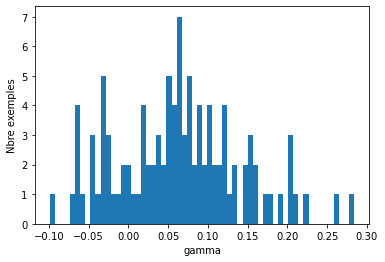



======= Initialisation Aleatoire avec Ea_limit =  6 =========
-------------------Affichage N+1 poids W --------------------
le N+1 poid W est : [ -837.17245756   715.22584486  1183.69850601   440.37838604
   984.47403041   813.39113008   832.12561086  -328.12299181
 -1208.90401427    -7.50555899   465.90003174   715.80720565
   141.73043716  -138.00177099   -34.87689793   678.34701794
 -1335.66859923  -376.39593214  1169.85948443  -203.44711657
   -49.77903101    16.93974399   127.8033189   -179.69226514
   727.43802283  -136.02796752   -81.92699202    65.11989696
  -232.57970388    78.29123337  1173.72269671 -1824.6751356
  1164.73368324  -402.70085127   -20.0870345    -64.04232725
  -243.52540486  -253.67388386   225.44745558   613.43864012
  -841.02416349   286.43670019  -255.28227481   134.84882946
  -230.12276377   685.45045434   557.05176643   -49.07554771
  1297.9414278   1646.81413562  -337.13536806   261.18334544
   273.02684864    90.87977388   351.350359    -100.77698778
 

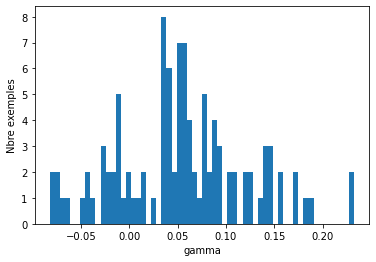



======= Initialisation Hebb avec Ea_limit =  6 =========
-------------------Affichage N+1 poids W --------------------
le N+1 poid W est : [-8.3000000e+02  7.0416670e+02  1.1583172e+03  4.4050600e+02
  9.7469050e+02  8.1879650e+02  8.1642950e+02 -3.2062670e+02
 -1.1933142e+03  4.1920000e-01  4.6325790e+02  7.3201700e+02
  1.5277540e+02 -1.2992090e+02 -1.8121600e+01  6.7181490e+02
 -1.3089808e+03 -3.7017160e+02  1.1218049e+03 -2.0574030e+02
 -4.8708500e+01  2.3125600e+01  1.1028380e+02 -1.7860600e+02
  7.1485700e+02 -1.3046670e+02 -7.1739400e+01  7.3584600e+01
 -2.3209720e+02  8.9913200e+01  1.1527869e+03 -1.7897382e+03
  1.1240789e+03 -3.8596700e+02 -2.9654800e+01 -4.4709500e+01
 -2.4500570e+02 -2.6111910e+02  2.3500620e+02  5.9595960e+02
 -8.3629530e+02  2.8529800e+02 -2.5805750e+02  1.3247910e+02
 -2.1260220e+02  6.7042820e+02  5.4616520e+02 -2.0544700e+01
  1.2789347e+03  1.6076270e+03 -3.1720700e+02  2.5441730e+02
  2.6629280e+02  8.9005000e+01  3.3953580e+02 -9.9075200e+01
 -5.8

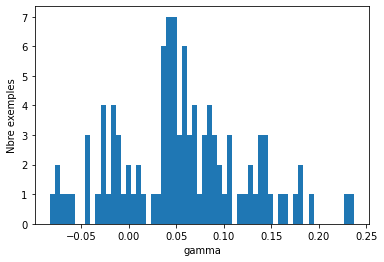

In [23]:
P = 104
N = 60
tau = train_label.reshape((P,1))
alpha = 1
nb_epochs = 10000
Ealim=[10,8,6]
for i in Ealim :
    
    print("======= Initialisation Aleatoire avec Ea_limit = ", i, "=========")

    W_init_aleatoire = np.random.rand(N+1,1)
    print("-------------------Affichage N+1 poids W --------------------")
    W = apprentissage_pocket(P, N, train, tau, alpha, nb_epochs, i, W_init_aleatoire)
    print('le N+1 poid W est :', W.squeeze())
    print('\n')
    print("-------------------Calcule erreur Ea et Eg --------------------")
    print('l erreur d apprentissage = ',erreur(train, W, train_label.reshape((P,1)))) 
    print('l erreur de generalisation = ',erreur(test, W, test_label.reshape((P,1))))
    print('\n')
    print("-------------------calcul les  stabilite --------------------")
    d = gamma(test, W, test_label.reshape((P,1)))
    print('les valeur de la stabilité sont :','\n', d.squeeze())
    print('\n')
    print("-------------------Affichage stabilite --------------------")
    plot_stabilite(d)
    print('\n')
    
    print("======= Initialisation Hebb avec Ea_limit = ", i, "=========")
    
    W_init_hebb = hebb(P,N,train,tau)
    print("-------------------Affichage N+1 poids W --------------------")
    W = apprentissage_pocket(P, N, train, tau, alpha, nb_epochs, i, W_init_hebb)
    print('le N+1 poid W est :', W.squeeze())
    print('\n')
    print("-------------------Calcule erreur Ea et Eg --------------------")
    print('l erreur d apprentissage = ',erreur(train, W, train_label.reshape((P,1)))) 
    print('l erreur de generalisation = ',erreur(test, W, test_label.reshape((P,1)))) 
    print('\n')
    print("-------------------calcul les  stabilite --------------------")
    d = gamma(test, W, test_label.reshape((P,1)))
    print('les valeur de la stabilité sont :','\n', d.squeeze())
    print('\n')
    print("-------------------Affichage stabilite --------------------")
    plot_stabilite(d)
    print('\n')
    
    

# Apprentissage sur les données tests et tester sur les données train avec alpha = 0.1, 0.7,1

# Alpha = 0.1

======= Initialisation Aleatoire avec Ea_limit =  10 =========
-------------------Affichage N+1 poids W --------------------
le N+1 poid W est : [-271.31665891   31.78620123  -43.67624655  -26.3066206    68.39051348
   50.67894276 -120.23463547 -242.79482815    8.52708415  301.46226686
  273.32979843  533.85071     472.19501638  138.60169159 -108.83951732
 -252.57889753  -38.86144191  -63.52758959 -146.96683883   10.59689717
  128.88603324  118.66396626  102.10309368  166.42265799   86.39232601
 -174.17629729 -192.11259581   -4.95521262  111.18699825   -2.54674167
  -24.83581949 -255.90775702   29.06919043  -75.3236244  -149.87732031
  -81.22541378 -229.33458046 -319.4492596    -7.69989741  219.23263436
  -90.32425236   37.00212255  136.87577664  353.04892399  452.95481634
  340.75154468  169.29171782  102.35907008  128.11089332   23.02256237
  -13.14770559   35.88638094   28.28499451    9.28523483    8.51955014
    4.33329788   10.90944858    8.35228878   10.00219029   28.96604228
   

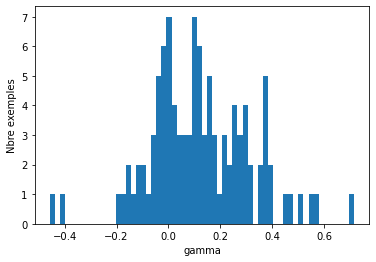



======= Initialisation Hebb avec Ea_limit =  10 =========
-------------------Affichage N+1 poids W --------------------
le N+1 poid W est : [-8.3000000e+02  7.0416670e+02  1.1583172e+03  4.4050600e+02
  9.7469050e+02  8.1879650e+02  8.1642950e+02 -3.2062670e+02
 -1.1933142e+03  4.1920000e-01  4.6325790e+02  7.3201700e+02
  1.5277540e+02 -1.2992090e+02 -1.8121600e+01  6.7181490e+02
 -1.3089808e+03 -3.7017160e+02  1.1218049e+03 -2.0574030e+02
 -4.8708500e+01  2.3125600e+01  1.1028380e+02 -1.7860600e+02
  7.1485700e+02 -1.3046670e+02 -7.1739400e+01  7.3584600e+01
 -2.3209720e+02  8.9913200e+01  1.1527869e+03 -1.7897382e+03
  1.1240789e+03 -3.8596700e+02 -2.9654800e+01 -4.4709500e+01
 -2.4500570e+02 -2.6111910e+02  2.3500620e+02  5.9595960e+02
 -8.3629530e+02  2.8529800e+02 -2.5805750e+02  1.3247910e+02
 -2.1260220e+02  6.7042820e+02  5.4616520e+02 -2.0544700e+01
  1.2789347e+03  1.6076270e+03 -3.1720700e+02  2.5441730e+02
  2.6629280e+02  8.9005000e+01  3.3953580e+02 -9.9075200e+01
 -5.

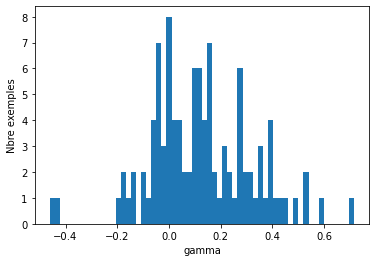



======= Initialisation Aleatoire avec Ea_limit =  8 =========
-------------------Affichage N+1 poids W --------------------
le N+1 poid W est : [-265.01185057   47.97010607  -73.4826256   -46.75195948   88.61936964
   36.6039914  -203.41181226 -379.08542667    4.04527202  375.90634194
  248.78066999  612.52587294  479.67048469   83.87468102 -103.15059664
 -279.10295921   80.16987613    3.91080524 -153.50400904   -4.20456675
  105.11225701  119.97170934   63.05804167  200.65098483  180.35952796
 -226.85307167 -243.09369526   37.1135237   182.03439977    5.65644396
  -15.18324721 -254.54268685   64.33491286  -61.29956046 -178.13242446
   15.27142186 -195.32339223 -436.59404845  -37.04444082  273.24207864
 -150.23290309   60.51526137  107.56486587  399.03789928  543.8709953
  348.51559819  101.81151356   66.42645208  153.84365041   10.74912191
  -26.50267293   56.37951934   43.46996878   15.85288319   12.1645538
    6.4738735    13.7388039    18.69653128   15.39616254   48.26800066
    

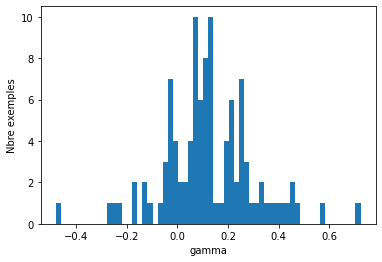



======= Initialisation Hebb avec Ea_limit =  8 =========
-------------------Affichage N+1 poids W --------------------
le N+1 poid W est : [-8.3000000e+02  7.0416670e+02  1.1583172e+03  4.4050600e+02
  9.7469050e+02  8.1879650e+02  8.1642950e+02 -3.2062670e+02
 -1.1933142e+03  4.1920000e-01  4.6325790e+02  7.3201700e+02
  1.5277540e+02 -1.2992090e+02 -1.8121600e+01  6.7181490e+02
 -1.3089808e+03 -3.7017160e+02  1.1218049e+03 -2.0574030e+02
 -4.8708500e+01  2.3125600e+01  1.1028380e+02 -1.7860600e+02
  7.1485700e+02 -1.3046670e+02 -7.1739400e+01  7.3584600e+01
 -2.3209720e+02  8.9913200e+01  1.1527869e+03 -1.7897382e+03
  1.1240789e+03 -3.8596700e+02 -2.9654800e+01 -4.4709500e+01
 -2.4500570e+02 -2.6111910e+02  2.3500620e+02  5.9595960e+02
 -8.3629530e+02  2.8529800e+02 -2.5805750e+02  1.3247910e+02
 -2.1260220e+02  6.7042820e+02  5.4616520e+02 -2.0544700e+01
  1.2789347e+03  1.6076270e+03 -3.1720700e+02  2.5441730e+02
  2.6629280e+02  8.9005000e+01  3.3953580e+02 -9.9075200e+01
 -5.8

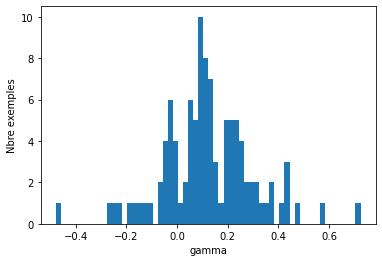



======= Initialisation Aleatoire avec Ea_limit =  6 =========
-------------------Affichage N+1 poids W --------------------
le N+1 poid W est : [-2.81343588e+02  5.41481744e+01 -8.37273950e+01 -5.49306671e+01
  9.92032480e+01  4.36684735e+01 -2.36312226e+02 -4.47530990e+02
 -3.78373958e+00  3.96103687e+02  2.26451941e+02  6.50391662e+02
  4.90697174e+02  6.53834086e+01 -1.15919478e+02 -3.12042146e+02
  1.13149417e+02  1.12271946e+01 -1.66712971e+02 -2.17530075e+01
  1.06104246e+02  1.35499450e+02  6.16185604e+01  2.06806212e+02
  1.96586567e+02 -2.47591219e+02 -2.62746639e+02  3.46939108e+01
  1.91410062e+02  2.92523511e-01 -9.15767037e+00 -2.50539071e+02
  8.38531615e+01 -5.76711412e+01 -1.99521954e+02  5.45022887e+01
 -1.81501970e+02 -4.97021692e+02 -3.99296031e+01  3.06373602e+02
 -1.78370220e+02  7.74572266e+01  1.12811686e+02  4.23168005e+02
  5.73606625e+02  3.45182024e+02  7.49693033e+01  6.31801150e+01
  1.77282719e+02  6.77463891e+00 -3.19792467e+01  6.87235264e+01
  5.11385

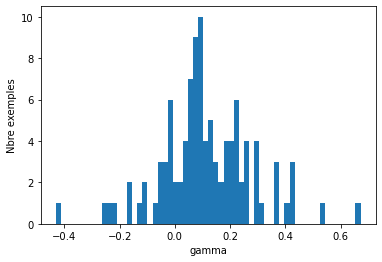



======= Initialisation Hebb avec Ea_limit =  6 =========
-------------------Affichage N+1 poids W --------------------
le N+1 poid W est : [-8.3000000e+02  7.0416670e+02  1.1583172e+03  4.4050600e+02
  9.7469050e+02  8.1879650e+02  8.1642950e+02 -3.2062670e+02
 -1.1933142e+03  4.1920000e-01  4.6325790e+02  7.3201700e+02
  1.5277540e+02 -1.2992090e+02 -1.8121600e+01  6.7181490e+02
 -1.3089808e+03 -3.7017160e+02  1.1218049e+03 -2.0574030e+02
 -4.8708500e+01  2.3125600e+01  1.1028380e+02 -1.7860600e+02
  7.1485700e+02 -1.3046670e+02 -7.1739400e+01  7.3584600e+01
 -2.3209720e+02  8.9913200e+01  1.1527869e+03 -1.7897382e+03
  1.1240789e+03 -3.8596700e+02 -2.9654800e+01 -4.4709500e+01
 -2.4500570e+02 -2.6111910e+02  2.3500620e+02  5.9595960e+02
 -8.3629530e+02  2.8529800e+02 -2.5805750e+02  1.3247910e+02
 -2.1260220e+02  6.7042820e+02  5.4616520e+02 -2.0544700e+01
  1.2789347e+03  1.6076270e+03 -3.1720700e+02  2.5441730e+02
  2.6629280e+02  8.9005000e+01  3.3953580e+02 -9.9075200e+01
 -5.8

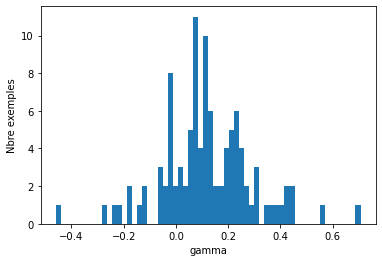

In [24]:
P = 104
N = 60
tau = test_label.reshape((P,1))
alpha = 0.1
nb_epochs = 10000
Ealim=[10,8,6]
for i in Ealim :
    
    print("======= Initialisation Aleatoire avec Ea_limit = ", i, "=========")

    W_init_aleatoire = np.random.rand(N+1,1)
    print("-------------------Affichage N+1 poids W --------------------")
    W_rand = apprentissage_pocket(P, N, test, tau, alpha, nb_epochs, i, W_init_aleatoire)
    print('le N+1 poid W est :', W_rand.squeeze())
    print('\n')
    print("-------------------Calcule erreur Ea et Eg --------------------")
    print('l erreur d apprentissage = ',erreur(test, W_rand, test_label.reshape((P,1)))) 
    print('l erreur de generalisation = ',erreur(train, W_rand, train_label.reshape((P,1)))) 
    print('\n')
    print("-------------------calcul les  stabilite --------------------")
    d = gamma(train, W_rand, test_label.reshape((P,1)))
    print('les valeur de la stabilité sont :','\n', d.squeeze())
    print('\n')
    print("-------------------Affichage stabilite --------------------")
    plot_stabilite(d)
    print('\n')
    print("======= Initialisation Hebb avec Ea_limit = ", i, "=========")
    W_init_hebb = hebb(P,N,train,tau)
    print("-------------------Affichage N+1 poids W --------------------")
    W_hebb = apprentissage_pocket(P, N, test, tau, alpha, nb_epochs, i, W_init_hebb)
    print('le N+1 poid W est :', W.squeeze())
    print('\n')
    print("-------------------Calcule erreur Ea et Eg --------------------")
    print('l erreur d apprentissage = ',erreur(test, W_hebb, test_label.reshape((P,1)))) 
    print('l erreur de generalisation = ',erreur(train, W_hebb, train_label.reshape((P,1))))
    print('\n')
    d = gamma(train, W_hebb, test_label.reshape((P,1)))
    print('les valeur de la stabilité sont :','\n', d.squeeze())
    print('\n')
    print("-------------------Affichage stabilite --------------------")
    plot_stabilite(d)
    print('\n')

# Alpha = 0.7

======= Initialisation Aleatoire avec Ea_limit =  10 =========
-------------------Affichage N+1 poids W --------------------
le N+1 poid W est : [-271.15469656   31.11347809  -37.63306935  -22.64761341   67.46753693
   52.24247122 -110.18451998 -219.8510757    10.27090252  289.83123157
  274.30504912  523.05212208  469.24594708  145.87694162 -106.34653299
 -245.6807839   -49.83016009  -70.51274994 -142.70897138   13.85287256
  128.01350861  118.29864202  107.44794039  165.55589699   80.52984752
 -159.68812568 -185.18392032   -9.01834947  104.71420095   -4.84778181
  -32.90745713 -259.44633162   23.33131993  -70.66370249 -152.81909687
  -99.05907128 -235.54512573 -303.62441912  -11.79347846  201.02815406
  -86.98981151   36.19989357  147.13062431  351.91581341  447.97352745
  343.51166611  178.82150701  109.44616695  125.97927307   26.39903339
  -10.73670095   33.3927484    25.78113057    8.23278856    7.85294058
    4.17069039   10.74221808    8.27965731    9.50307121   26.23575011
   

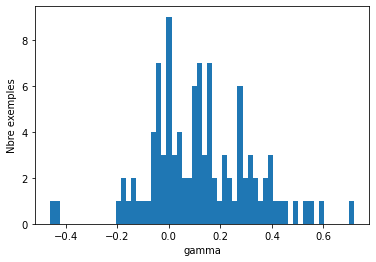



======= Initialisation Hebb avec Ea_limit =  10 =========
-------------------Affichage N+1 poids W --------------------
le N+1 poid W est : [-8.3000000e+02  7.0416670e+02  1.1583172e+03  4.4050600e+02
  9.7469050e+02  8.1879650e+02  8.1642950e+02 -3.2062670e+02
 -1.1933142e+03  4.1920000e-01  4.6325790e+02  7.3201700e+02
  1.5277540e+02 -1.2992090e+02 -1.8121600e+01  6.7181490e+02
 -1.3089808e+03 -3.7017160e+02  1.1218049e+03 -2.0574030e+02
 -4.8708500e+01  2.3125600e+01  1.1028380e+02 -1.7860600e+02
  7.1485700e+02 -1.3046670e+02 -7.1739400e+01  7.3584600e+01
 -2.3209720e+02  8.9913200e+01  1.1527869e+03 -1.7897382e+03
  1.1240789e+03 -3.8596700e+02 -2.9654800e+01 -4.4709500e+01
 -2.4500570e+02 -2.6111910e+02  2.3500620e+02  5.9595960e+02
 -8.3629530e+02  2.8529800e+02 -2.5805750e+02  1.3247910e+02
 -2.1260220e+02  6.7042820e+02  5.4616520e+02 -2.0544700e+01
  1.2789347e+03  1.6076270e+03 -3.1720700e+02  2.5441730e+02
  2.6629280e+02  8.9005000e+01  3.3953580e+02 -9.9075200e+01
 -5.

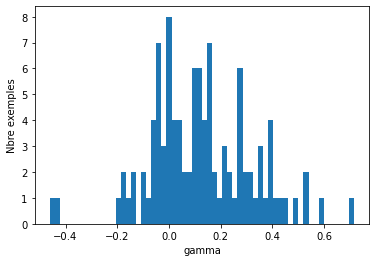



======= Initialisation Aleatoire avec Ea_limit =  8 =========
-------------------Affichage N+1 poids W --------------------
le N+1 poid W est : [-2.61378800e+02  4.61866150e+01 -7.12975018e+01 -4.66248249e+01
  8.87208041e+01  4.06840707e+01 -1.97178814e+02 -3.74537670e+02
 -1.60466642e-01  3.68938581e+02  2.50287520e+02  6.12861180e+02
  4.85570582e+02  9.00324096e+01 -1.07395801e+02 -2.82693652e+02
  6.45156122e+01 -8.99649905e+00 -1.56208655e+02 -2.60588897e+00
  1.16244071e+02  1.27210322e+02  7.29674076e+01  2.04179471e+02
  1.75390530e+02 -2.23834868e+02 -2.38887692e+02  3.41033015e+01
  1.79142649e+02  1.05872759e+01 -1.35882011e+01 -2.58717601e+02
  6.03302647e+01 -6.15839296e+01 -1.74352136e+02  5.74053757e+00
 -2.00235367e+02 -4.34799777e+02 -3.43911340e+01  2.76720921e+02
 -1.46018723e+02  5.28393550e+01  1.09323701e+02  3.96108467e+02
  5.35496597e+02  3.43020839e+02  1.02408774e+02  6.82912804e+01
  1.52250041e+02  9.93150533e+00 -2.61798292e+01  5.51570381e+01
  4.22474

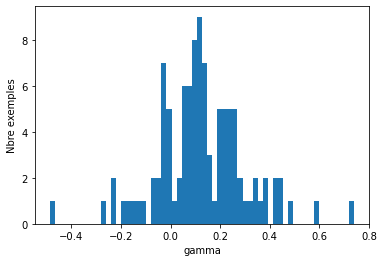



======= Initialisation Hebb avec Ea_limit =  8 =========
-------------------Affichage N+1 poids W --------------------
le N+1 poid W est : [-8.3000000e+02  7.0416670e+02  1.1583172e+03  4.4050600e+02
  9.7469050e+02  8.1879650e+02  8.1642950e+02 -3.2062670e+02
 -1.1933142e+03  4.1920000e-01  4.6325790e+02  7.3201700e+02
  1.5277540e+02 -1.2992090e+02 -1.8121600e+01  6.7181490e+02
 -1.3089808e+03 -3.7017160e+02  1.1218049e+03 -2.0574030e+02
 -4.8708500e+01  2.3125600e+01  1.1028380e+02 -1.7860600e+02
  7.1485700e+02 -1.3046670e+02 -7.1739400e+01  7.3584600e+01
 -2.3209720e+02  8.9913200e+01  1.1527869e+03 -1.7897382e+03
  1.1240789e+03 -3.8596700e+02 -2.9654800e+01 -4.4709500e+01
 -2.4500570e+02 -2.6111910e+02  2.3500620e+02  5.9595960e+02
 -8.3629530e+02  2.8529800e+02 -2.5805750e+02  1.3247910e+02
 -2.1260220e+02  6.7042820e+02  5.4616520e+02 -2.0544700e+01
  1.2789347e+03  1.6076270e+03 -3.1720700e+02  2.5441730e+02
  2.6629280e+02  8.9005000e+01  3.3953580e+02 -9.9075200e+01
 -5.8

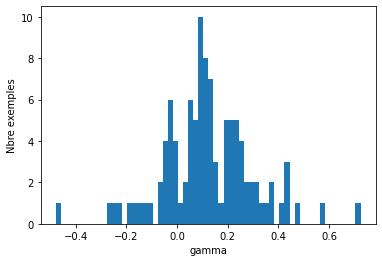



======= Initialisation Aleatoire avec Ea_limit =  6 =========
-------------------Affichage N+1 poids W --------------------
le N+1 poid W est : [-265.02367097   48.2310746   -75.07235427  -49.49374049   91.42990094
   41.88547877 -207.01764234 -393.91227125    2.21490887  376.98271021
  243.13932132  624.1051272   488.96923348   81.92547886 -108.48034375
 -286.92593465   83.58206299   -2.57635656 -163.01628548   -9.26760468
  110.11267618  125.5530711    65.09592033  199.22167531  179.09631873
 -232.12166098 -248.61293349   35.9015062   183.25100778    6.78930153
  -10.88651139 -256.50664971   68.78191642  -60.67829065 -181.10562777
   23.00399903 -195.66378387 -453.31429455  -36.14048312  283.27861186
 -157.92692498   58.18328428  111.10330702  407.62088088  545.08910889
  341.11956997   96.55364737   64.74675253  156.47746238    8.12222725
  -28.10416472   58.1043512    45.40625609   17.260867     12.4971018
    6.32201889   13.728459     18.61585052   15.098769     48.82576292
   

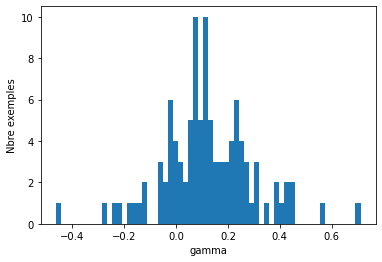



======= Initialisation Hebb avec Ea_limit =  6 =========
-------------------Affichage N+1 poids W --------------------
le N+1 poid W est : [-8.3000000e+02  7.0416670e+02  1.1583172e+03  4.4050600e+02
  9.7469050e+02  8.1879650e+02  8.1642950e+02 -3.2062670e+02
 -1.1933142e+03  4.1920000e-01  4.6325790e+02  7.3201700e+02
  1.5277540e+02 -1.2992090e+02 -1.8121600e+01  6.7181490e+02
 -1.3089808e+03 -3.7017160e+02  1.1218049e+03 -2.0574030e+02
 -4.8708500e+01  2.3125600e+01  1.1028380e+02 -1.7860600e+02
  7.1485700e+02 -1.3046670e+02 -7.1739400e+01  7.3584600e+01
 -2.3209720e+02  8.9913200e+01  1.1527869e+03 -1.7897382e+03
  1.1240789e+03 -3.8596700e+02 -2.9654800e+01 -4.4709500e+01
 -2.4500570e+02 -2.6111910e+02  2.3500620e+02  5.9595960e+02
 -8.3629530e+02  2.8529800e+02 -2.5805750e+02  1.3247910e+02
 -2.1260220e+02  6.7042820e+02  5.4616520e+02 -2.0544700e+01
  1.2789347e+03  1.6076270e+03 -3.1720700e+02  2.5441730e+02
  2.6629280e+02  8.9005000e+01  3.3953580e+02 -9.9075200e+01
 -5.8

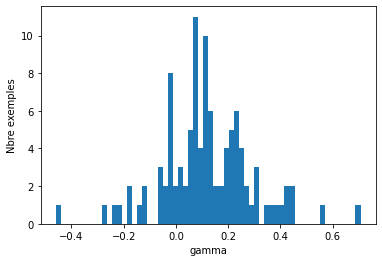

In [25]:
P = 104
N = 60
tau = test_label.reshape((P,1))
alpha = 0.7
nb_epochs = 10000
Ealim=[10,8,6]
for i in Ealim :
    
    print("======= Initialisation Aleatoire avec Ea_limit = ", i, "=========")

    W_init_aleatoire = np.random.rand(N+1,1)
    print("-------------------Affichage N+1 poids W --------------------")
    W_rand = apprentissage_pocket(P, N, test, tau, alpha, nb_epochs, i, W_init_aleatoire)
    print('le N+1 poid W est :', W_rand.squeeze())
    print('\n')
    print("-------------------Calcule erreur Ea et Eg --------------------")
    print('l erreur d apprentissage = ',erreur(test, W_rand, test_label.reshape((P,1)))) 
    print('l erreur de generalisation = ',erreur(train, W_rand, train_label.reshape((P,1)))) 
    print('\n')
    print("-------------------calcul les  stabilite --------------------")
    d = gamma(train, W_rand, test_label.reshape((P,1)))
    print('les valeur de la stabilité sont :','\n', d.squeeze())
    print('\n')
    print("-------------------Affichage stabilite --------------------")
    plot_stabilite(d)
    print('\n')
    print("======= Initialisation Hebb avec Ea_limit = ", i, "=========")
    W_init_hebb = hebb(P,N,train,tau)
    print("-------------------Affichage N+1 poids W --------------------")
    W_hebb = apprentissage_pocket(P, N, test, tau, alpha, nb_epochs, i, W_init_hebb)
    print('le N+1 poid W est :', W.squeeze())
    print('\n')
    print("-------------------Calcule erreur Ea et Eg --------------------")
    print('l erreur d apprentissage = ',erreur(test, W_hebb, test_label.reshape((P,1)))) 
    print('l erreur de generalisation = ',erreur(train, W_hebb, train_label.reshape((P,1))))
    print('\n')
    d = gamma(train, W_hebb, test_label.reshape((P,1)))
    print('les valeur de la stabilité sont :','\n', d.squeeze())
    print('\n')
    print("-------------------Affichage stabilite --------------------")
    plot_stabilite(d)
    print('\n')

# Alpha = 1

======= Initialisation Aleatoire avec Ea_limit =  10 =========
-------------------Affichage N+1 poids W --------------------
le N+1 poid W est : [-2.69247654e+02  3.07964374e+01 -4.21171369e+01 -2.62470951e+01
  6.55133279e+01  4.96496937e+01 -1.13708728e+02 -2.26977582e+02
  6.27780180e+00  2.86540467e+02  2.67921203e+02  5.19355376e+02
  4.61570618e+02  1.39474888e+02 -9.79018682e+01 -2.34609113e+02
 -4.01396978e+01 -6.35453864e+01 -1.41575531e+02  1.39791918e+01
  1.22460555e+02  1.13452353e+02  1.04971370e+02  1.62538215e+02
  8.01360542e+01 -1.65346818e+02 -1.86590936e+02 -7.29848916e+00
  1.07512324e+02  6.09335310e-02 -2.90646718e+01 -2.53353714e+02
  2.22542826e+01 -7.55155044e+01 -1.57321088e+02 -9.42256297e+01
 -2.29083509e+02 -3.03113685e+02 -1.54696389e+01  2.01094505e+02
 -8.72705578e+01  3.82020271e+01  1.41306561e+02  3.45374984e+02
  4.44302375e+02  3.39077348e+02  1.70760375e+02  1.03010366e+02
  1.23597773e+02  2.37137762e+01 -1.20110515e+01  3.37893113e+01
  2.605231

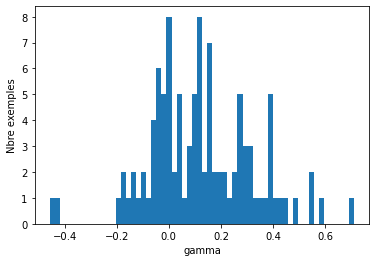



======= Initialisation Hebb avec Ea_limit =  10 =========
-------------------Affichage N+1 poids W --------------------
le N+1 poid W est : [-8.3000000e+02  7.0416670e+02  1.1583172e+03  4.4050600e+02
  9.7469050e+02  8.1879650e+02  8.1642950e+02 -3.2062670e+02
 -1.1933142e+03  4.1920000e-01  4.6325790e+02  7.3201700e+02
  1.5277540e+02 -1.2992090e+02 -1.8121600e+01  6.7181490e+02
 -1.3089808e+03 -3.7017160e+02  1.1218049e+03 -2.0574030e+02
 -4.8708500e+01  2.3125600e+01  1.1028380e+02 -1.7860600e+02
  7.1485700e+02 -1.3046670e+02 -7.1739400e+01  7.3584600e+01
 -2.3209720e+02  8.9913200e+01  1.1527869e+03 -1.7897382e+03
  1.1240789e+03 -3.8596700e+02 -2.9654800e+01 -4.4709500e+01
 -2.4500570e+02 -2.6111910e+02  2.3500620e+02  5.9595960e+02
 -8.3629530e+02  2.8529800e+02 -2.5805750e+02  1.3247910e+02
 -2.1260220e+02  6.7042820e+02  5.4616520e+02 -2.0544700e+01
  1.2789347e+03  1.6076270e+03 -3.1720700e+02  2.5441730e+02
  2.6629280e+02  8.9005000e+01  3.3953580e+02 -9.9075200e+01
 -5.

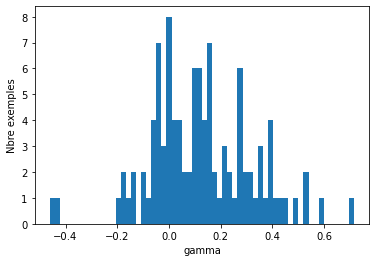



======= Initialisation Aleatoire avec Ea_limit =  8 =========
-------------------Affichage N+1 poids W --------------------
le N+1 poid W est : [-267.90866491   46.66042678  -77.16186348  -49.36660395   93.97517228
   44.10352225 -203.85941398 -395.71774972    2.20285858  383.3880684
  250.75267751  630.51403983  498.87750454   88.25352754 -118.52895947
 -303.02029156   61.2963884   -11.79455175 -166.30551542   -5.87090026
  123.1650766   141.47869545   70.26312194  204.1925985   186.2519391
 -235.5175307  -250.25402506   30.95532147  176.79312516   -1.20228207
  -16.67530253 -274.7425756    65.94333834  -64.93264636 -174.15441266
   23.70378987 -188.00199704 -449.35359626  -21.412812    303.0102319
 -148.65991081   61.606474    113.56046609  412.41071279  551.39066256
  346.29648361   95.56608955   63.62716825  154.4327403     7.16447334
  -28.37186494   58.20407274   45.61441234   16.94840099   12.46912483
    6.28466617   14.98196587   18.83612624   15.449801     49.90554313
    8

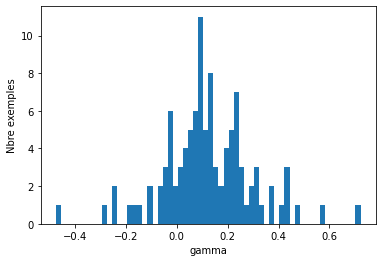



======= Initialisation Hebb avec Ea_limit =  8 =========
-------------------Affichage N+1 poids W --------------------
le N+1 poid W est : [-8.3000000e+02  7.0416670e+02  1.1583172e+03  4.4050600e+02
  9.7469050e+02  8.1879650e+02  8.1642950e+02 -3.2062670e+02
 -1.1933142e+03  4.1920000e-01  4.6325790e+02  7.3201700e+02
  1.5277540e+02 -1.2992090e+02 -1.8121600e+01  6.7181490e+02
 -1.3089808e+03 -3.7017160e+02  1.1218049e+03 -2.0574030e+02
 -4.8708500e+01  2.3125600e+01  1.1028380e+02 -1.7860600e+02
  7.1485700e+02 -1.3046670e+02 -7.1739400e+01  7.3584600e+01
 -2.3209720e+02  8.9913200e+01  1.1527869e+03 -1.7897382e+03
  1.1240789e+03 -3.8596700e+02 -2.9654800e+01 -4.4709500e+01
 -2.4500570e+02 -2.6111910e+02  2.3500620e+02  5.9595960e+02
 -8.3629530e+02  2.8529800e+02 -2.5805750e+02  1.3247910e+02
 -2.1260220e+02  6.7042820e+02  5.4616520e+02 -2.0544700e+01
  1.2789347e+03  1.6076270e+03 -3.1720700e+02  2.5441730e+02
  2.6629280e+02  8.9005000e+01  3.3953580e+02 -9.9075200e+01
 -5.8

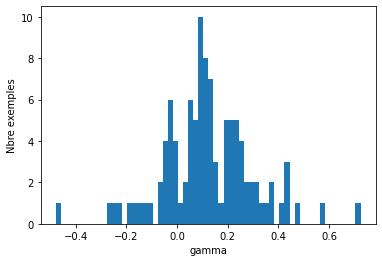



======= Initialisation Aleatoire avec Ea_limit =  6 =========
-------------------Affichage N+1 poids W --------------------
le N+1 poid W est : [-269.31184805   47.99111337  -76.49668121  -49.37201051   90.11075076
   40.53784663 -207.49292897 -389.27725358    0.89899288  377.15463116
  249.40082689  626.35283394  494.2527784    88.50155251 -106.21238664
 -279.9435546    80.02264056    1.11522356 -161.4286498    -6.31707109
  107.33356828  122.59172915   62.90759317  197.03469883  178.14802022
 -230.34963337 -244.61520691   33.54381312  184.60889674    6.79056167
  -12.72363195 -256.85355418   71.369509    -62.3837924  -185.06061702
    8.70359242 -206.48578276 -448.74758194  -37.35527852  282.85978482
 -153.49046424   57.640898    110.50087236  404.25243334  546.78194573
  347.46279065  103.87009231   70.05119547  156.98249082    9.7907595
  -27.44914233   57.91064388   43.57171486   15.71083278   12.24720678
    6.06401304   13.63618169   18.62581375   14.52264323   48.86495729
   

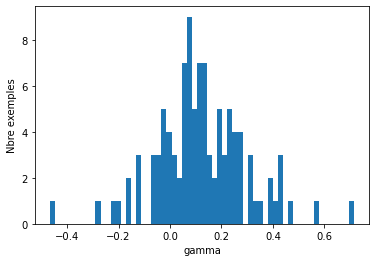



======= Initialisation Hebb avec Ea_limit =  6 =========
-------------------Affichage N+1 poids W --------------------
le N+1 poid W est : [-8.3000000e+02  7.0416670e+02  1.1583172e+03  4.4050600e+02
  9.7469050e+02  8.1879650e+02  8.1642950e+02 -3.2062670e+02
 -1.1933142e+03  4.1920000e-01  4.6325790e+02  7.3201700e+02
  1.5277540e+02 -1.2992090e+02 -1.8121600e+01  6.7181490e+02
 -1.3089808e+03 -3.7017160e+02  1.1218049e+03 -2.0574030e+02
 -4.8708500e+01  2.3125600e+01  1.1028380e+02 -1.7860600e+02
  7.1485700e+02 -1.3046670e+02 -7.1739400e+01  7.3584600e+01
 -2.3209720e+02  8.9913200e+01  1.1527869e+03 -1.7897382e+03
  1.1240789e+03 -3.8596700e+02 -2.9654800e+01 -4.4709500e+01
 -2.4500570e+02 -2.6111910e+02  2.3500620e+02  5.9595960e+02
 -8.3629530e+02  2.8529800e+02 -2.5805750e+02  1.3247910e+02
 -2.1260220e+02  6.7042820e+02  5.4616520e+02 -2.0544700e+01
  1.2789347e+03  1.6076270e+03 -3.1720700e+02  2.5441730e+02
  2.6629280e+02  8.9005000e+01  3.3953580e+02 -9.9075200e+01
 -5.8

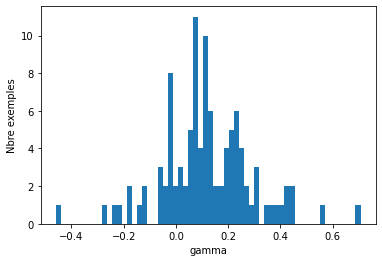

In [26]:
P = 104
N = 60
tau = test_label.reshape((P,1))
alpha = 1
nb_epochs = 10000
Ealim=[10,8,6]
for i in Ealim :
    
    print("======= Initialisation Aleatoire avec Ea_limit = ", i, "=========")

    W_init_aleatoire = np.random.rand(N+1,1)
    print("-------------------Affichage N+1 poids W --------------------")
    W_rand = apprentissage_pocket(P, N, test, tau, alpha, nb_epochs, i, W_init_aleatoire)
    print('le N+1 poid W est :', W_rand.squeeze())
    print('\n')
    print("-------------------Calcule erreur Ea et Eg --------------------")
    print('l erreur d apprentissage = ',erreur(test, W_rand, test_label.reshape((P,1)))) 
    print('l erreur de generalisation = ',erreur(train, W_rand, train_label.reshape((P,1)))) 
    print('\n')
    print("-------------------calcul les  stabilite --------------------")
    d = gamma(train, W_rand, test_label.reshape((P,1)))
    print('les valeur de la stabilité sont :','\n', d.squeeze())
    print('\n')
    print("-------------------Affichage stabilite --------------------")
    plot_stabilite(d)
    print('\n')
    print("======= Initialisation Hebb avec Ea_limit = ", i, "=========")
    W_init_hebb = hebb(P,N,train,tau)
    print("-------------------Affichage N+1 poids W --------------------")
    W_hebb = apprentissage_pocket(P, N, test, tau, alpha, nb_epochs, i, W_init_hebb)
    print('le N+1 poid W est :', W.squeeze())
    print('\n')
    print("-------------------Calcule erreur Ea et Eg --------------------")
    print('l erreur d apprentissage = ',erreur(test, W_hebb, test_label.reshape((P,1)))) 
    print('l erreur de generalisation = ',erreur(train, W_hebb, train_label.reshape((P,1))))
    print('\n')
    d = gamma(train, W_hebb, test_label.reshape((P,1)))
    print('les valeur de la stabilité sont :','\n', d.squeeze())
    print('\n')
    print("-------------------Affichage stabilite --------------------")
    plot_stabilite(d)
    print('\n')

# Partie III Apprentissage sur train et test

In [27]:
P = 208
N = 60
tau = data_label.reshape((P,1))
alpha = 0.1
nb_epochs = 10000
Ealim=208

print("======= version batch  =========")
W_batch = perceptron_version_batch(P, N, data, tau, alpha)
print('le N+1 poid W est :','\n', W_batch.squeeze())
print('l erreur d apprentissage = ',erreur(data, W_batch, data_label.reshape((P,1)))) 
#print('l erreur de generalisation = ',erreur(test, W, test_label.reshape((P,1)))) 
print('\n')   

======= version batch  =========
le N+1 poid W est : 
 [-3.26617026e+02  8.73799784e+02  4.34999214e+01 -1.29237298e+03
  5.99333311e+02 -2.55629489e+02  3.55299880e+02 -4.69368360e+02
 -3.54630910e+02  4.91876317e+02 -1.96076216e+02  1.98801620e+02
  4.50038493e+02 -2.20796268e+02  2.20946649e+01  1.45469708e+02
 -2.20618793e+02 -2.29072847e+02  2.61878091e+02 -2.01613131e+02
  4.84909111e+02 -5.39340345e+02  6.37373605e+02 -4.51362472e+02
  5.09268290e+02 -2.30375047e+02 -7.60818924e+01  1.94063142e+02
 -1.01441103e+02 -7.88455277e+01  4.93302117e+02 -6.30123365e+02
  2.21920919e+02  1.84195705e+02 -3.27011611e+02  2.46116898e+02
 -3.15145047e+01 -3.33971590e+02  8.11280096e+01  2.79331935e+02
 -3.81805634e+02  8.60313891e+01  1.19951266e+02  5.10347252e+01
  1.06497384e+02 -1.05982993e+02  2.51584773e+02  2.56409602e+00
  7.37796260e+02  1.07976023e+03 -4.52563978e+03  1.53339753e+03
  2.66057341e+03  1.79698385e+03  3.73503750e+02  1.74188812e+02
 -1.18806436e+03 -8.97523448e+02  1